In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import time
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from pythonlibs.torch_lib1 import *
from torchviz import make_dot

In [51]:
# matplotlibの初期設定
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = (6,6)
plt.rcParams['font.size'] = 14

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [3]:
# データ準備
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
])

data_root = './hidden_data'

train_set = datasets.CIFAR10(data_root, train=True, transform=transform, download=True)
test_set = datasets.CIFAR10(data_root, train=False, transform=transform, download=True)


Files already downloaded and verified
Files already downloaded and verified


In [70]:
# バッチサイズ
batch_size = 100

# データローダ
train_loader = DataLoader(dataset=train_set,
                          batch_size=batch_size,
                          shuffle=True)

test_loader = DataLoader(dataset=test_set,
                          batch_size=batch_size,
                          shuffle=False)

In [5]:
# 正解ラベル定義
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

n_output = len(list(set(classes)))


In [6]:
# ６階層を深くしたモデル
class CNN_v2(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=(1,1))
        self.conv2 = nn.Conv2d(32, 32, 3, padding=(1,1))
        self.conv3 = nn.Conv2d(32, 64, 3, padding=(1,1))
        self.conv4 = nn.Conv2d(64, 64, 3, padding=(1,1))
        self.conv5 = nn.Conv2d(64, 128, 3, padding=(1,1))
        self.conv6 = nn.Conv2d(128, 128, 3, padding=(1,1))
        self.relu = nn.ReLU(inplace=True)
        self.flatten = nn.Flatten()
        self.maxpool = nn.MaxPool2d((2,2))
        self.l1 = nn.Linear(4*4*128, 128)
        self.l2 = nn.Linear(128, num_classes)

        self.features = nn.Sequential(
            self.conv1,
            self.relu,
            self.conv2,
            self.relu,
            self.maxpool,
            self.conv3,
            self.relu,
            self.conv4,
            self.relu,
            self.maxpool,
            self.conv5,
            self.relu,
            self.conv6,
            self.relu,
            self.maxpool,
            )

        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.l2
        )

    def forward(self, x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3

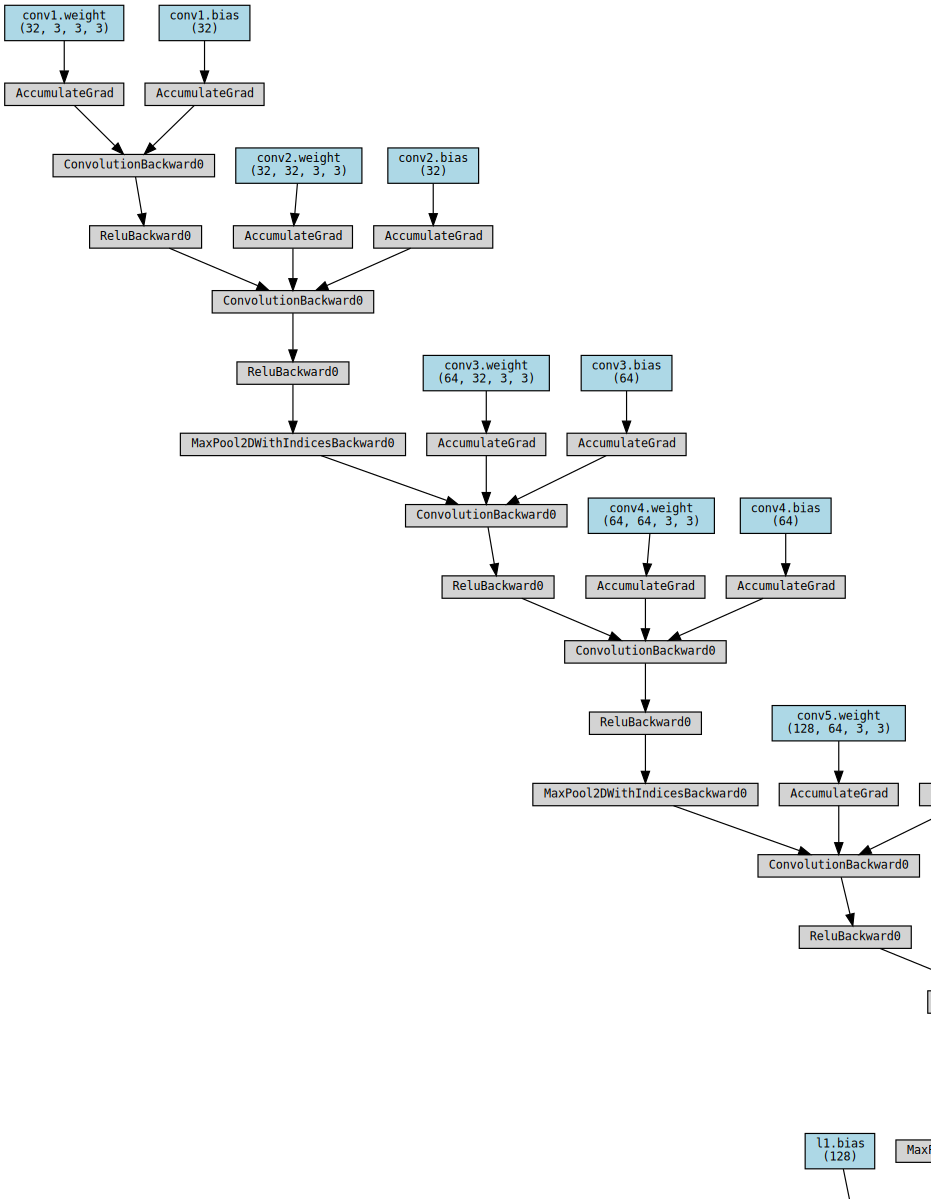

<Figure size 1000x1000 with 0 Axes>

In [50]:
plt.figure(figsize=(10,10))
net = CNN_v2(n_output).to(device)
criterion = nn.CrossEntropyLoss()
loss = eval_loss(test_loader, device, net, criterion)
make_dot(loss, dict(net.named_parameters()))

In [8]:
# 乱数固定
torch_seed()

# モデルインスタンス生成
lr = 0.01
net = CNN_v2(n_output).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr)
history = np.zeros((0, 5))

In [11]:

num_epochs = 50
start = time.time()
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)
end = time.time()
print(end-start)

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1/50], loss: 2.30284 acc: 0.10000 val_loss: 2.30262, val_acc: 0.10000


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [2/50], loss: 2.30256 acc: 0.10000 val_loss: 2.30241, val_acc: 0.10000


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [3/50], loss: 2.30237 acc: 0.10066 val_loss: 2.30221, val_acc: 0.10000


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [4/50], loss: 2.30211 acc: 0.11154 val_loss: 2.30187, val_acc: 0.12960


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [5/50], loss: 2.30159 acc: 0.14456 val_loss: 2.30105, val_acc: 0.16920


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [6/50], loss: 2.29996 acc: 0.17596 val_loss: 2.29782, val_acc: 0.21970


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [7/50], loss: 2.28867 acc: 0.21242 val_loss: 2.25830, val_acc: 0.21160


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [8/50], loss: 2.09855 acc: 0.23862 val_loss: 1.99009, val_acc: 0.28280


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [9/50], loss: 1.95080 acc: 0.29142 val_loss: 1.89407, val_acc: 0.31650


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [10/50], loss: 1.84128 acc: 0.33664 val_loss: 1.80927, val_acc: 0.35490


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [11/50], loss: 1.73500 acc: 0.37200 val_loss: 1.68556, val_acc: 0.38420


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [12/50], loss: 1.65596 acc: 0.39890 val_loss: 1.58245, val_acc: 0.42070


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [13/50], loss: 1.59249 acc: 0.41598 val_loss: 1.54138, val_acc: 0.43540


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [14/50], loss: 1.54680 acc: 0.43452 val_loss: 1.53636, val_acc: 0.44020


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [15/50], loss: 1.50133 acc: 0.44834 val_loss: 1.44828, val_acc: 0.46480


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [16/50], loss: 1.45999 acc: 0.46798 val_loss: 1.40788, val_acc: 0.48810


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [17/50], loss: 1.41842 acc: 0.48404 val_loss: 1.38034, val_acc: 0.49920


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [18/50], loss: 1.37329 acc: 0.50514 val_loss: 1.33356, val_acc: 0.51540


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [19/50], loss: 1.32525 acc: 0.52312 val_loss: 1.28845, val_acc: 0.54100


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [20/50], loss: 1.28177 acc: 0.54154 val_loss: 1.25415, val_acc: 0.55020


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [21/50], loss: 1.23834 acc: 0.55906 val_loss: 1.21310, val_acc: 0.56600


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [22/50], loss: 1.18732 acc: 0.57856 val_loss: 1.19245, val_acc: 0.57030


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [23/50], loss: 1.14994 acc: 0.59308 val_loss: 1.14377, val_acc: 0.59480


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [24/50], loss: 1.10933 acc: 0.60882 val_loss: 1.18270, val_acc: 0.58280


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [25/50], loss: 1.07112 acc: 0.62332 val_loss: 1.07723, val_acc: 0.61980


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [26/50], loss: 1.03251 acc: 0.63824 val_loss: 1.07036, val_acc: 0.62600


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [27/50], loss: 0.99800 acc: 0.64956 val_loss: 1.07190, val_acc: 0.62430


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [28/50], loss: 0.96108 acc: 0.66370 val_loss: 1.04186, val_acc: 0.63440


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [29/50], loss: 0.92659 acc: 0.67562 val_loss: 1.00280, val_acc: 0.65250


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [30/50], loss: 0.89369 acc: 0.68846 val_loss: 0.97484, val_acc: 0.65590


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [31/50], loss: 0.86127 acc: 0.69814 val_loss: 0.97247, val_acc: 0.65700


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [32/50], loss: 0.83030 acc: 0.70956 val_loss: 1.00394, val_acc: 0.65440


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [33/50], loss: 0.79934 acc: 0.71992 val_loss: 0.97865, val_acc: 0.66130


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [34/50], loss: 0.76893 acc: 0.73228 val_loss: 0.96090, val_acc: 0.66980


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [35/50], loss: 0.73777 acc: 0.74268 val_loss: 0.95201, val_acc: 0.67740


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [36/50], loss: 0.70870 acc: 0.75140 val_loss: 0.91973, val_acc: 0.68170


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [37/50], loss: 0.67941 acc: 0.76266 val_loss: 0.94808, val_acc: 0.67660


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [38/50], loss: 0.64790 acc: 0.77392 val_loss: 0.92933, val_acc: 0.69000


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [39/50], loss: 0.62025 acc: 0.78466 val_loss: 0.91182, val_acc: 0.69410


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [40/50], loss: 0.59248 acc: 0.79240 val_loss: 0.93878, val_acc: 0.69470


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [41/50], loss: 0.56278 acc: 0.80362 val_loss: 0.96026, val_acc: 0.68630


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [42/50], loss: 0.53181 acc: 0.81468 val_loss: 0.92290, val_acc: 0.70230


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [43/50], loss: 0.49778 acc: 0.82742 val_loss: 0.97229, val_acc: 0.69950


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [44/50], loss: 0.47044 acc: 0.83484 val_loss: 1.02689, val_acc: 0.68530


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [45/50], loss: 0.43517 acc: 0.84678 val_loss: 1.03042, val_acc: 0.69110


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [46/50], loss: 0.40738 acc: 0.85614 val_loss: 1.04047, val_acc: 0.69650


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [47/50], loss: 0.37849 acc: 0.86724 val_loss: 1.06505, val_acc: 0.69790


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [48/50], loss: 0.35064 acc: 0.87818 val_loss: 1.12938, val_acc: 0.69760


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [49/50], loss: 0.32120 acc: 0.88832 val_loss: 1.13617, val_acc: 0.69070


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [50/50], loss: 0.29132 acc: 0.89880 val_loss: 1.19322, val_acc: 0.69550
733.1256217956543


初期状態: 損失: 2.30262 精度: 0.10000
最終状態: 損失: 1.19322 精度: 0.69550


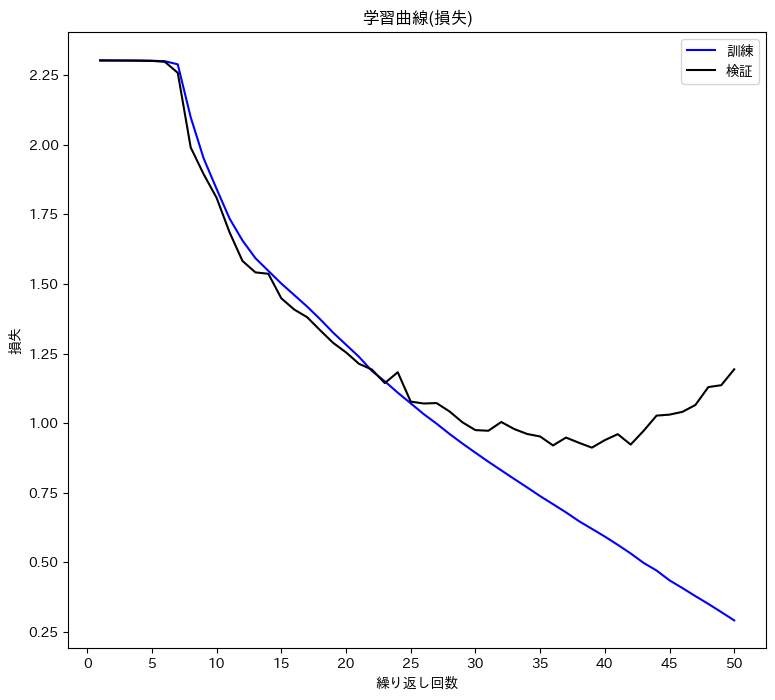

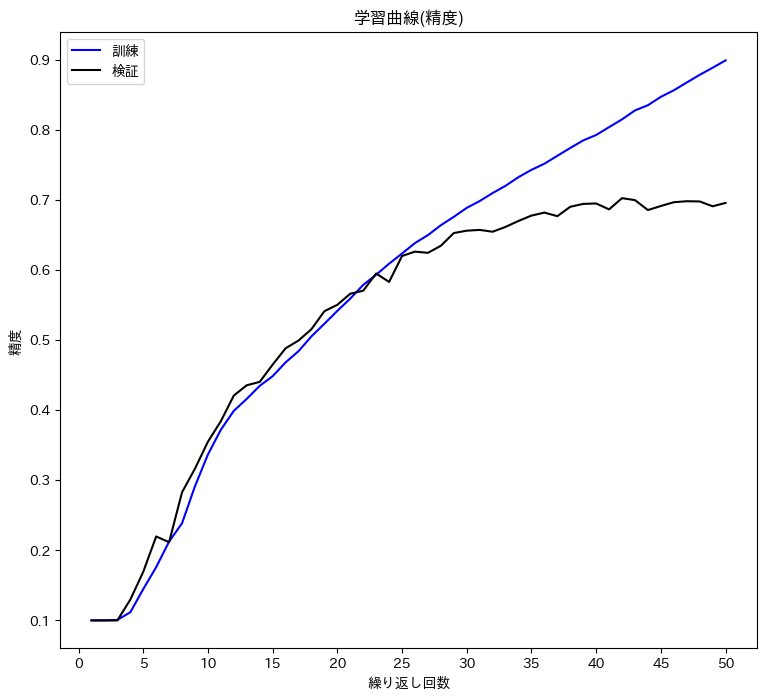

In [12]:
evaluate_history(history)

In [13]:
# 乱数の固定化
torch_seed()

# モデルインスタンス生成
net = CNN_v2(n_output).to(device)
criterion = nn.CrossEntropyLoss()
# 最適化関数にAdamを指定
optimizer = optim.Adam(net.parameters())
history3 = np.zeros((0, 5))

print(optimizer)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


In [14]:

num_epochs = 20
history3 = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history3)

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1/20], loss: 1.57530 acc: 0.42332 val_loss: 1.25427, val_acc: 0.54830


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [2/20], loss: 1.08340 acc: 0.61230 val_loss: 1.02133, val_acc: 0.63930


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [3/20], loss: 0.85734 acc: 0.69802 val_loss: 0.86052, val_acc: 0.70460


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [4/20], loss: 0.70343 acc: 0.75248 val_loss: 0.79591, val_acc: 0.72720


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [5/20], loss: 0.59533 acc: 0.78936 val_loss: 0.71254, val_acc: 0.75400


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [6/20], loss: 0.50895 acc: 0.82198 val_loss: 0.73250, val_acc: 0.75820


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [7/20], loss: 0.42452 acc: 0.85056 val_loss: 0.68814, val_acc: 0.77570


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [8/20], loss: 0.35229 acc: 0.87642 val_loss: 0.77600, val_acc: 0.76820


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [9/20], loss: 0.28426 acc: 0.89762 val_loss: 0.79569, val_acc: 0.76370


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [10/20], loss: 0.23185 acc: 0.91756 val_loss: 0.88676, val_acc: 0.76340


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [11/20], loss: 0.18735 acc: 0.93320 val_loss: 0.98972, val_acc: 0.76410


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [12/20], loss: 0.15736 acc: 0.94422 val_loss: 1.05795, val_acc: 0.76220


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [13/20], loss: 0.13121 acc: 0.95420 val_loss: 1.08125, val_acc: 0.76160


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [14/20], loss: 0.12581 acc: 0.95618 val_loss: 1.15826, val_acc: 0.77040


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [15/20], loss: 0.11149 acc: 0.96028 val_loss: 1.28963, val_acc: 0.76090


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [16/20], loss: 0.10506 acc: 0.96186 val_loss: 1.28394, val_acc: 0.76920


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [17/20], loss: 0.09260 acc: 0.96794 val_loss: 1.26184, val_acc: 0.77090


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [18/20], loss: 0.08828 acc: 0.96914 val_loss: 1.30735, val_acc: 0.76280


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [19/20], loss: 0.08212 acc: 0.97050 val_loss: 1.47753, val_acc: 0.76390


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [20/20], loss: 0.08628 acc: 0.97098 val_loss: 1.40980, val_acc: 0.75810


初期状態: 損失: 1.25427 精度: 0.54830
最終状態: 損失: 1.40980 精度: 0.75810


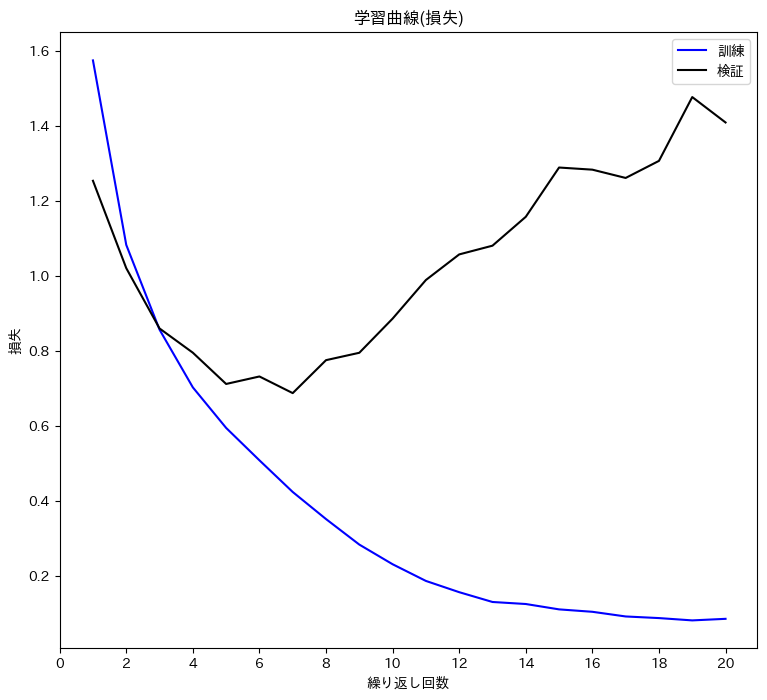

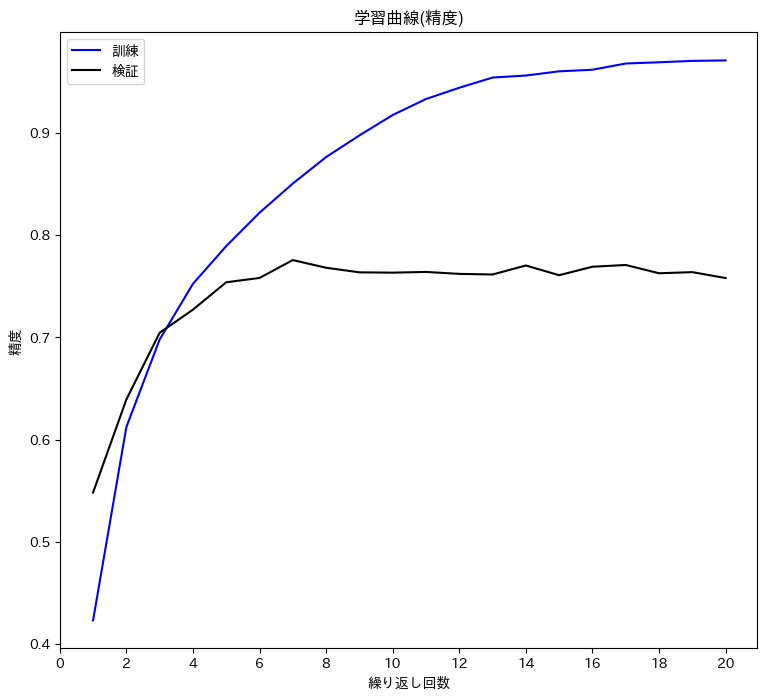

In [15]:
evaluate_history(history3)

In [17]:
# 乱数の固定化
torch_seed()

# モデルインスタンス生成
lr = 0.01
net = CNN_v2(n_output).to(device)
criterion = nn.CrossEntropyLoss()
# 最適化関数にmomentumを指定
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)
history2 = np.zeros((0, 5))

In [18]:
# 学習

num_epochs = 20
history2 = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history2)

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1/20], loss: 2.28030 acc: 0.12456 val_loss: 2.02887, val_acc: 0.25870


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [2/20], loss: 1.78429 acc: 0.34204 val_loss: 1.54245, val_acc: 0.42180


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [3/20], loss: 1.40642 acc: 0.48492 val_loss: 1.26883, val_acc: 0.53760


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [4/20], loss: 1.16094 acc: 0.58118 val_loss: 1.08997, val_acc: 0.61620


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [5/20], loss: 0.96417 acc: 0.65754 val_loss: 0.88959, val_acc: 0.68360


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [6/20], loss: 0.81784 acc: 0.71318 val_loss: 0.82988, val_acc: 0.71050


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [7/20], loss: 0.68143 acc: 0.76170 val_loss: 0.77969, val_acc: 0.73320


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [8/20], loss: 0.58461 acc: 0.79428 val_loss: 0.75527, val_acc: 0.74590


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [9/20], loss: 0.49643 acc: 0.82574 val_loss: 0.74968, val_acc: 0.74890


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [10/20], loss: 0.42071 acc: 0.85236 val_loss: 0.75912, val_acc: 0.75770


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [11/20], loss: 0.34514 acc: 0.87750 val_loss: 0.77982, val_acc: 0.76300


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [12/20], loss: 0.28360 acc: 0.89964 val_loss: 0.80998, val_acc: 0.76390


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [13/20], loss: 0.23034 acc: 0.91760 val_loss: 0.95204, val_acc: 0.74980


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [14/20], loss: 0.19735 acc: 0.93006 val_loss: 0.94253, val_acc: 0.76530


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [15/20], loss: 0.16610 acc: 0.94072 val_loss: 1.06304, val_acc: 0.76090


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [16/20], loss: 0.14333 acc: 0.94898 val_loss: 1.05934, val_acc: 0.76070


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [17/20], loss: 0.12415 acc: 0.95560 val_loss: 1.32716, val_acc: 0.74210


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [18/20], loss: 0.11332 acc: 0.95952 val_loss: 1.11879, val_acc: 0.75270


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [19/20], loss: 0.09611 acc: 0.96600 val_loss: 1.30649, val_acc: 0.76610


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [20/20], loss: 0.09267 acc: 0.96778 val_loss: 1.29456, val_acc: 0.75810


初期状態: 損失: 2.02887 精度: 0.25870
最終状態: 損失: 1.29456 精度: 0.75810


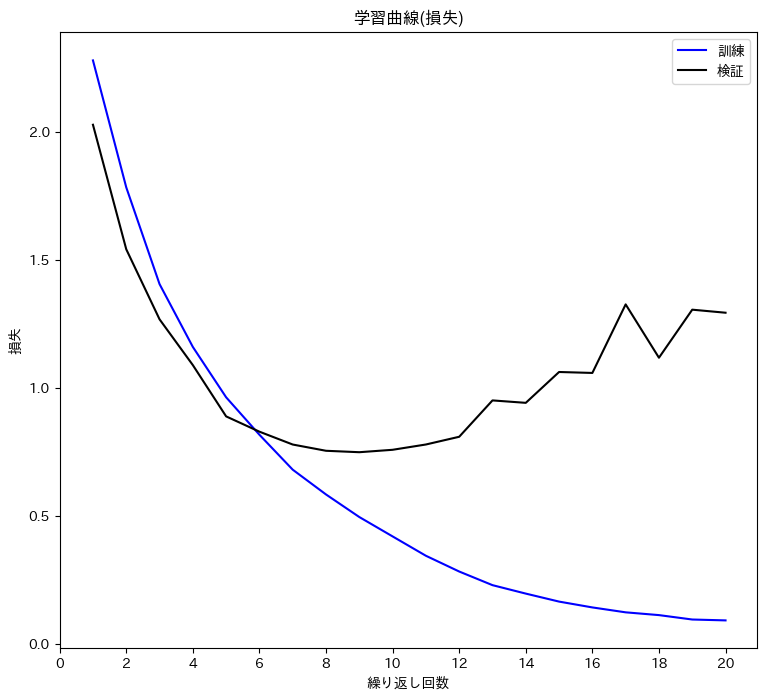

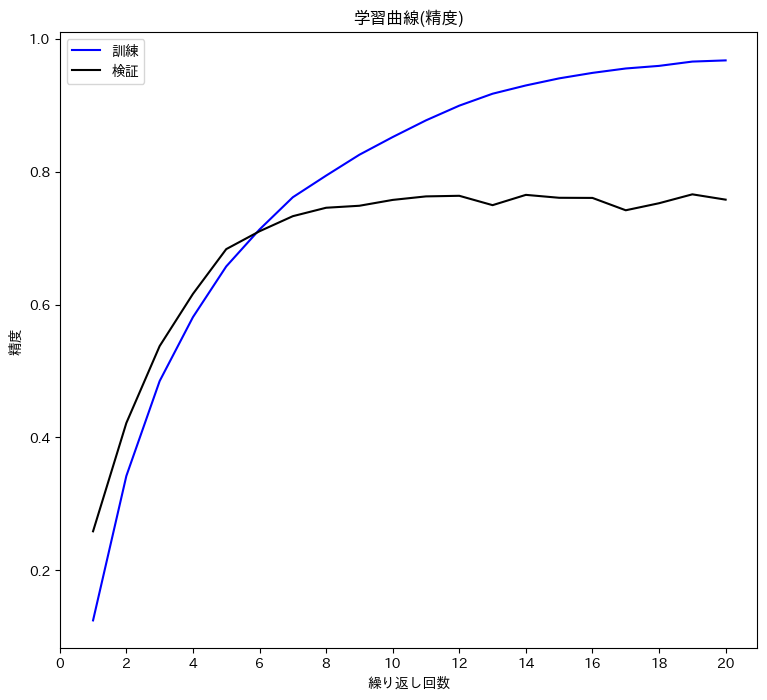

In [19]:
evaluate_history(history2)

## 結果の比較

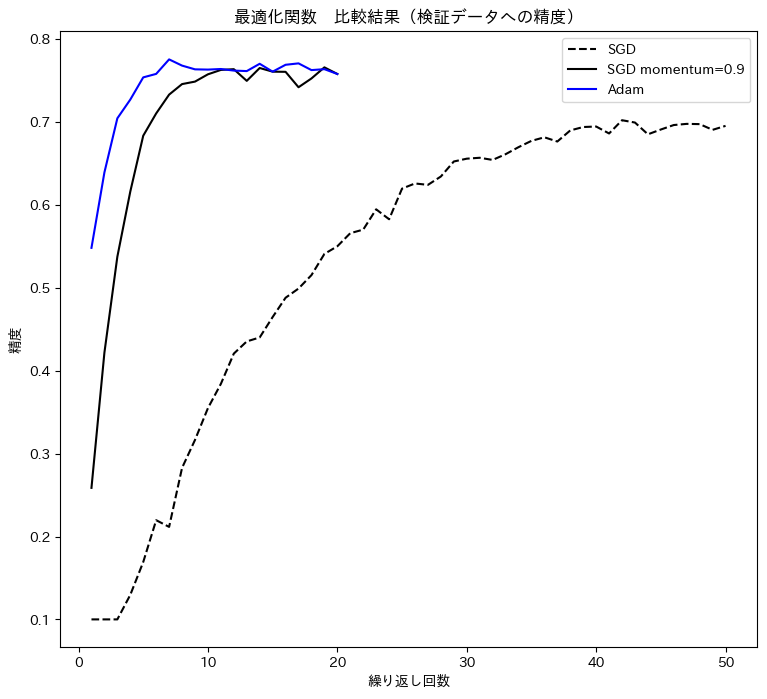

In [20]:
# 結果の比較(検証データへの精度)
plt.figure(figsize=(9,8))
plt.plot(history[:,0], history[:,4], label='SGD', c='k',ls='dashed' )
plt.plot(history2[:,0], history2[:,4], label='SGD momentum=0.9', c='k')
plt.plot(history3[:,0], history3[:,4], label='Adam', c='b')
plt.title('最適化関数　比較結果（検証データへの精度）')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.legend()
plt.show()

In [33]:
## ドロップアウト
class CNN_v3(nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 64, 3, padding=1)
        self.conv5 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv6 = nn.Conv2d(128, 128, 3, padding=1)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.maxpool = nn.MaxPool2d((2, 2))
        self.l1 = nn.Linear(4*4*128, 128)
        self.l2 = nn.Linear(128, n_classes)
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.3)
        self.dropout3 = nn.Dropout(0.4)

        self.features = nn.Sequential(
            self.conv1,
            self.relu,
            self.conv2,
            self.relu,
            self.maxpool,
            self.dropout1,
            self.conv3,
            self.relu,
            self.conv4,
            self.relu,
            self.maxpool,
            self.dropout2,
            self.conv5,
            self.relu,
            self.conv6,
            self.relu,
            self.maxpool,
            self.dropout3
        )

        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.dropout3,
            self.l2,
        )

    def forward(self, x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3 
        

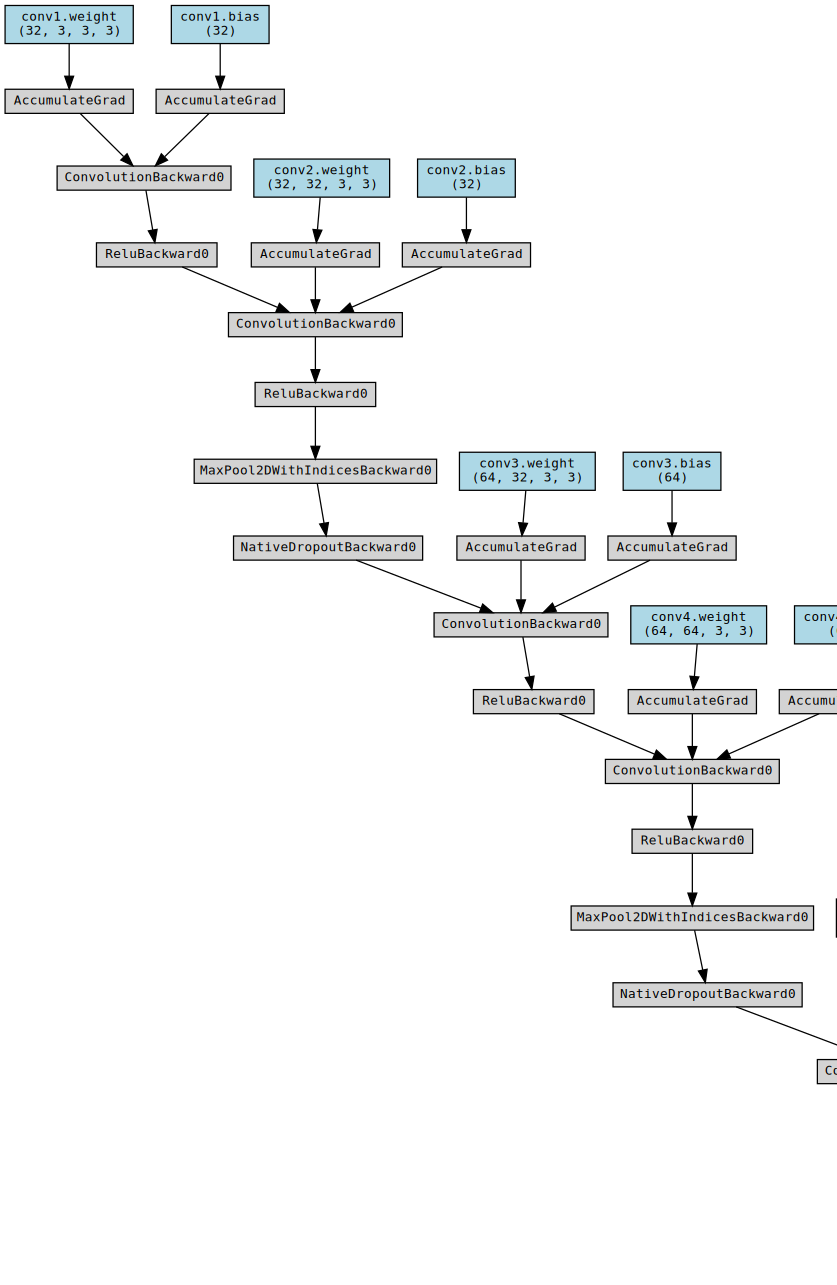

In [52]:
net = CNN_v3(n_output).to(device)
criterion = nn.CrossEntropyLoss()
loss = eval_loss(test_loader, device, net, criterion)
make_dot(loss, params = dict(net.named_parameters()))

In [36]:
torch_seed()

net = CNN_v3(n_output).to(device)
criterin = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
history = np.zeros((0, 5))

num_epoch = 50

history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1/20], loss: 1.72431 acc: 0.35976 val_loss: 1.37615, val_acc: 0.50510


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [2/20], loss: 1.31964 acc: 0.51702 val_loss: 1.09686, val_acc: 0.60110


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [3/20], loss: 1.14079 acc: 0.59162 val_loss: 0.96066, val_acc: 0.65490


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [4/20], loss: 1.00838 acc: 0.64000 val_loss: 0.86809, val_acc: 0.68970


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [5/20], loss: 0.91681 acc: 0.67774 val_loss: 0.82305, val_acc: 0.71110


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [6/20], loss: 0.85376 acc: 0.70204 val_loss: 0.74959, val_acc: 0.73300


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [7/20], loss: 0.79139 acc: 0.72540 val_loss: 0.70282, val_acc: 0.75120


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [8/20], loss: 0.75515 acc: 0.73942 val_loss: 0.70838, val_acc: 0.75150


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [9/20], loss: 0.72241 acc: 0.74856 val_loss: 0.66713, val_acc: 0.76850


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [10/20], loss: 0.69822 acc: 0.75888 val_loss: 0.67063, val_acc: 0.76950


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [11/20], loss: 0.67181 acc: 0.76732 val_loss: 0.63321, val_acc: 0.78200


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [12/20], loss: 0.65320 acc: 0.77238 val_loss: 0.63783, val_acc: 0.78640


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [13/20], loss: 0.62792 acc: 0.78086 val_loss: 0.60575, val_acc: 0.79650


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [14/20], loss: 0.61039 acc: 0.79018 val_loss: 0.58101, val_acc: 0.80020


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [15/20], loss: 0.60376 acc: 0.79092 val_loss: 0.60613, val_acc: 0.79530


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [16/20], loss: 0.57817 acc: 0.80090 val_loss: 0.57498, val_acc: 0.80760


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [17/20], loss: 0.58055 acc: 0.79886 val_loss: 0.56927, val_acc: 0.80310


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [18/20], loss: 0.56784 acc: 0.80208 val_loss: 0.58816, val_acc: 0.79870


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [19/20], loss: 0.54996 acc: 0.80938 val_loss: 0.58305, val_acc: 0.80430


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [20/20], loss: 0.53819 acc: 0.81368 val_loss: 0.56705, val_acc: 0.81090


初期状態: 損失: 1.37615 精度: 0.50510
最終状態: 損失: 0.56705 精度: 0.81090


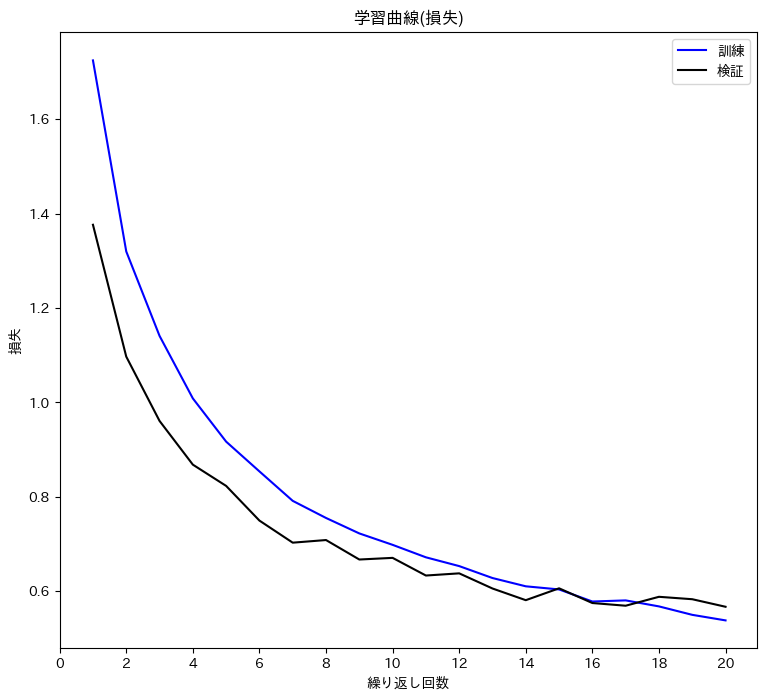

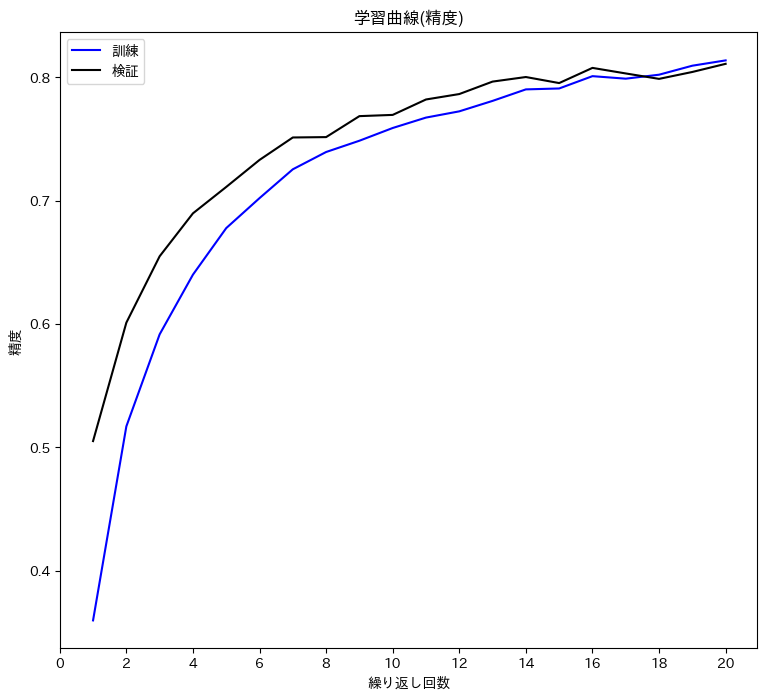

In [37]:
evaluate_history(history)

## Batch Normalization

In [ ]:
class CNN_v4(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=(1,1))
        self.conv2 = nn.Conv2d(32, 32, 3, padding=(1,1))
        self.conv3 = nn.Conv2d(32, 64, 3, padding=(1,1))
        self.conv4 = nn.Conv2d(64, 64, 3, padding=(1,1))
        self.conv5 = nn.Conv2d(64, 128, 3, padding=(1,1))
        self.conv6 = nn.Conv2d(128, 128, 3, padding=(1,1))
        self.relu = nn.ReLU(inplace=True)
        self.flatten = nn.Flatten()
        self.maxpool = nn.MaxPool2d((2,2))
        self.l1 = nn.Linear(4*4*128, 128)
        self.l2 = nn.Linear(128, num_classes)
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.3)
        self.dropout3 = nn.Dropout(0.4)
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(32)
        self.bn3 = nn.BatchNorm2d(64)
        self.bn4 = nn.BatchNorm2d(64)
        self.bn5 = nn.BatchNorm2d(128)
        self.bn6 = nn.BatchNorm2d(128)

        self.features = nn.Sequential(
            self.conv1,
            self.bn1,
            self.relu,
            self.conv2,
            self.bn2,
            self.relu,
            self.maxpool,
            self.dropout1,
            self.conv3,
            self.bn3,
            self.relu,
            self.conv4,
            self.bn4,
            self.relu,
            self.maxpool,
            self.dropout2,
            self.conv5,
            self.bn5,
            self.relu,
            self.conv6,
            self.bn6,
            self.relu,
            self.maxpool,
            self.dropout3,
            )

        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.dropout3,
            self.l2
        )

    def forward(self, x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3

In [80]:
# 乱数の固定化
torch_seed()

# モデルインスタンス生成
net = CNN_v4(n_output).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
history = np.zeros((0, 5))

In [81]:
# 学習

num_epochs = 50
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1/50], loss: 1.50954 acc: 0.44524 val_loss: 1.14796, val_acc: 0.59010


  0%|          | 0/500 [00:00<?, ?it/s]

KeyboardInterrupt: 

初期状態: 損失: 1.14796 精度: 0.59010
最終状態: 損失: 0.43100 精度: 0.87480


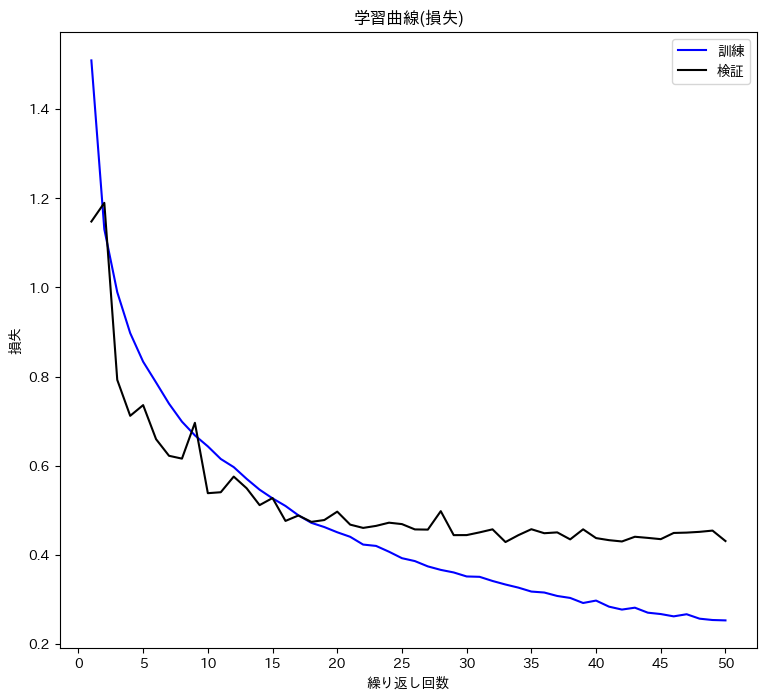

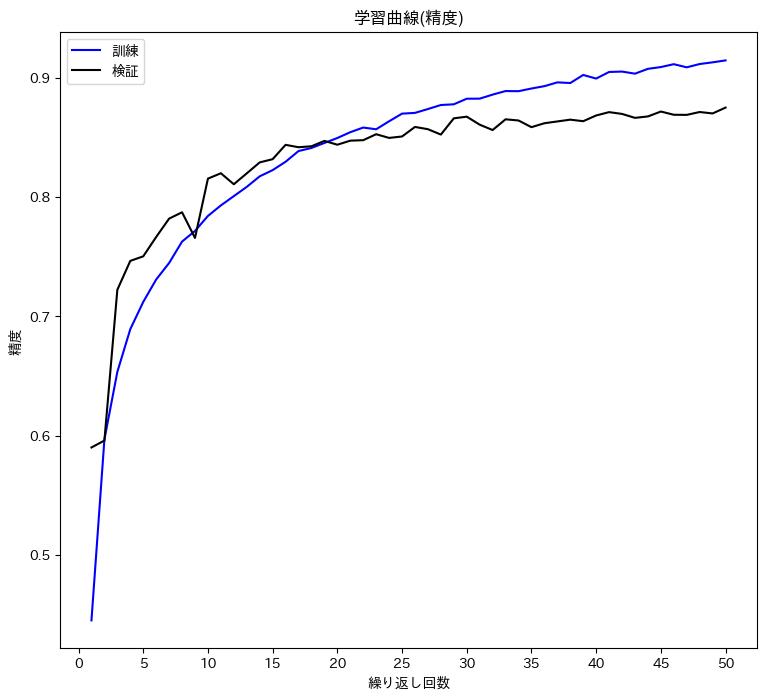

In [41]:
evaluate_history(history)

## Data Augmentation

In [82]:
# 訓練データ用: 正規化に追加で反転とRandomErasingを実施
transform_train = transforms.Compose([
  transforms.RandomHorizontalFlip(p=0.5), 
  transforms.ToTensor(),
  transforms.Normalize(0.5, 0.5), 
  transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)
])

In [83]:
# transfrom_trainを利用したデータセットの定義
train_set2 = datasets.CIFAR10(
    root = data_root, train = True, 
    download = True, transform = transform_train)

# traisform_trainを利用したデータローダーの定義
batch_size = 100
train_loader2 = DataLoader(train_set2, batch_size=batch_size, shuffle=True)

Files already downloaded and verified


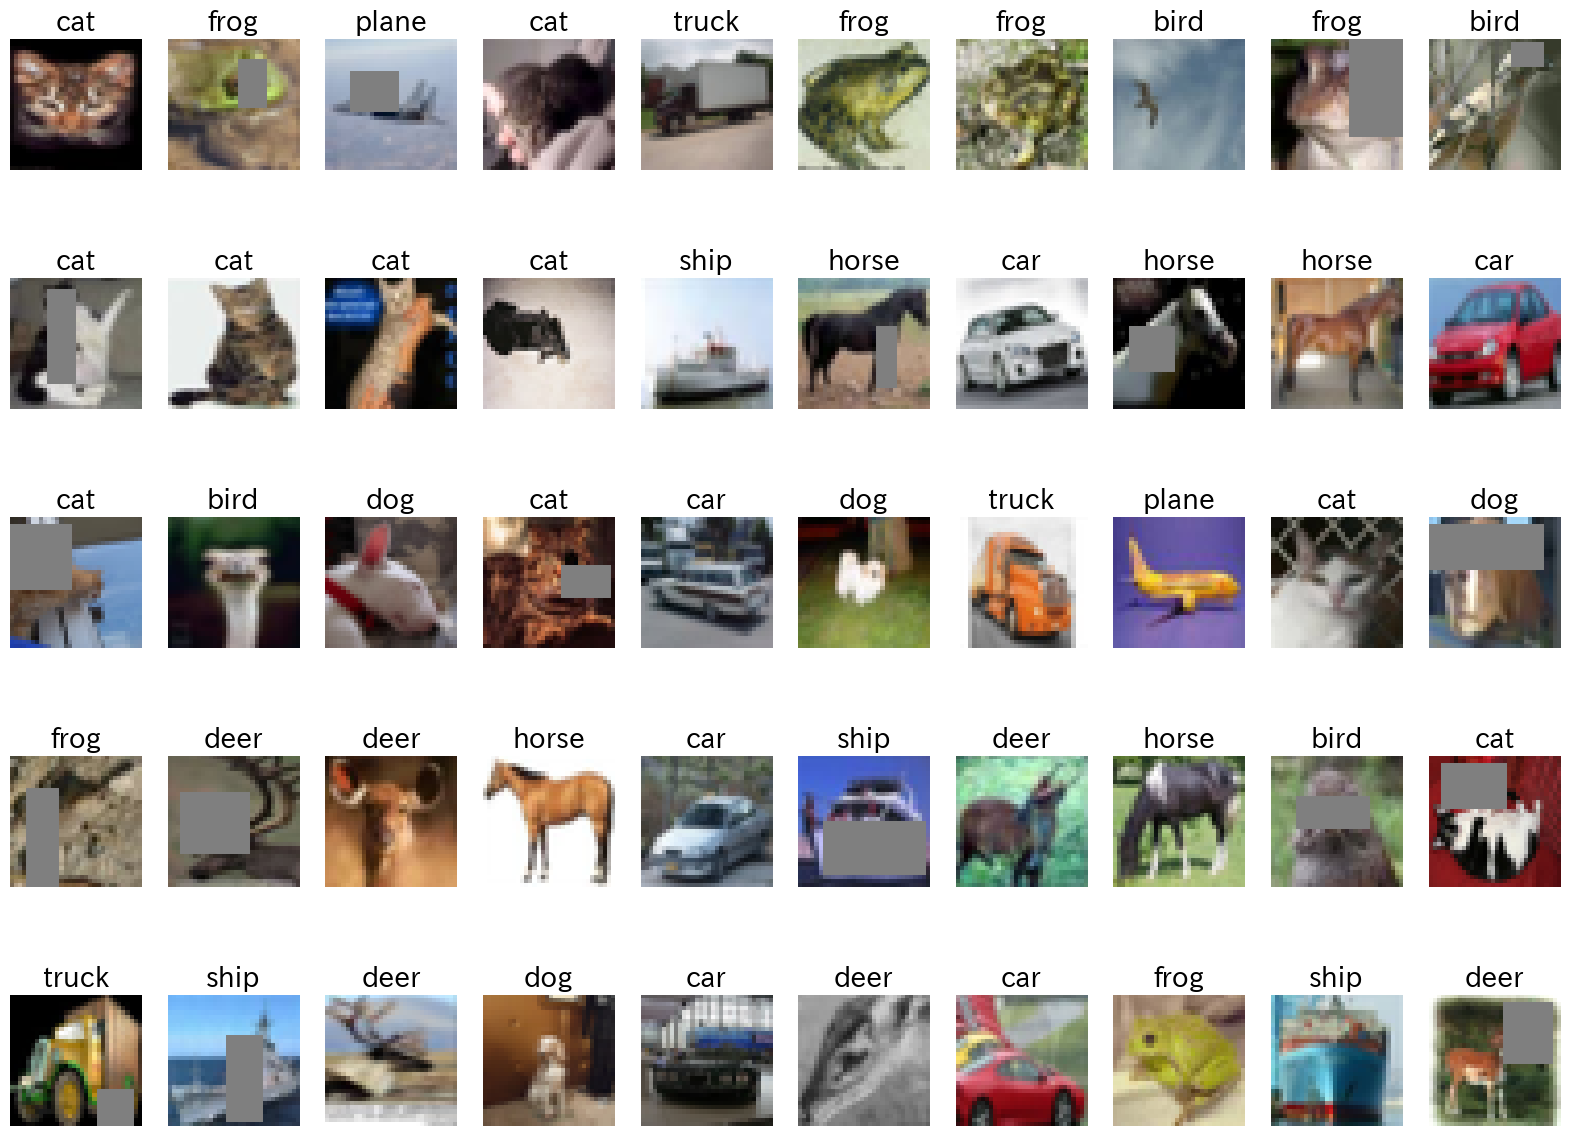

In [84]:
torch_seed()

show_images_labels(train_loader2, classes, None, None)

In [88]:
# 乱数の固定化
torch_seed()

# モデルインスタンス生成
net = CNN_v4(n_output).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
history = np.zeros((0, 5))

In [89]:
history4 = np.zeros((0, 5))
num_epoch = 100
start = time.time()
# 前回のfitからtrain_loaderに変わっただけ
history = fit(net, optimizer, criterion, num_epoch, train_loader2, test_loader, device, history4)

end = time.time()

print(f'終了までにかかった時間：{end - start}')

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1/100], loss: 1.60683 acc: 0.40582 val_loss: 1.23538, val_acc: 0.55500


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [2/100], loss: 1.25366 acc: 0.54752 val_loss: 0.93289, val_acc: 0.66390


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [3/100], loss: 1.10586 acc: 0.60628 val_loss: 0.86921, val_acc: 0.68710


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [4/100], loss: 1.02895 acc: 0.63874 val_loss: 0.79291, val_acc: 0.71780


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [5/100], loss: 0.96869 acc: 0.66120 val_loss: 0.72967, val_acc: 0.74180


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [6/100], loss: 0.92693 acc: 0.67482 val_loss: 0.74925, val_acc: 0.73490


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [7/100], loss: 0.88796 acc: 0.69282 val_loss: 0.65953, val_acc: 0.76630


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [8/100], loss: 0.86013 acc: 0.70458 val_loss: 0.71840, val_acc: 0.75420


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [9/100], loss: 0.82795 acc: 0.71468 val_loss: 0.61209, val_acc: 0.78560


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [10/100], loss: 0.80375 acc: 0.72704 val_loss: 0.63048, val_acc: 0.78230


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [11/100], loss: 0.78510 acc: 0.73216 val_loss: 0.58797, val_acc: 0.79440


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [12/100], loss: 0.76133 acc: 0.74268 val_loss: 0.58701, val_acc: 0.79980


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [13/100], loss: 0.74270 acc: 0.74658 val_loss: 0.58016, val_acc: 0.80370


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [14/100], loss: 0.73677 acc: 0.75136 val_loss: 0.54862, val_acc: 0.81170


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [15/100], loss: 0.71058 acc: 0.75910 val_loss: 0.52067, val_acc: 0.81900


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [16/100], loss: 0.69183 acc: 0.76648 val_loss: 0.51992, val_acc: 0.82150


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [17/100], loss: 0.68348 acc: 0.76904 val_loss: 0.49666, val_acc: 0.82990


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [18/100], loss: 0.67245 acc: 0.77582 val_loss: 0.51116, val_acc: 0.82920


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [19/100], loss: 0.65749 acc: 0.77926 val_loss: 0.49400, val_acc: 0.82970


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [20/100], loss: 0.64453 acc: 0.78102 val_loss: 0.47597, val_acc: 0.83730


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [21/100], loss: 0.63185 acc: 0.78850 val_loss: 0.49024, val_acc: 0.83590


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [22/100], loss: 0.62352 acc: 0.78920 val_loss: 0.47100, val_acc: 0.84170


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [23/100], loss: 0.61427 acc: 0.79300 val_loss: 0.47572, val_acc: 0.83920


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [24/100], loss: 0.60770 acc: 0.79452 val_loss: 0.44769, val_acc: 0.84840


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [25/100], loss: 0.60360 acc: 0.79706 val_loss: 0.47768, val_acc: 0.83930


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [26/100], loss: 0.59140 acc: 0.80138 val_loss: 0.46384, val_acc: 0.84720


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [27/100], loss: 0.58446 acc: 0.80256 val_loss: 0.46082, val_acc: 0.84420


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [28/100], loss: 0.57991 acc: 0.80566 val_loss: 0.47477, val_acc: 0.84060


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [29/100], loss: 0.57532 acc: 0.80596 val_loss: 0.41924, val_acc: 0.86060


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [30/100], loss: 0.56607 acc: 0.80964 val_loss: 0.41791, val_acc: 0.85950


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [31/100], loss: 0.56408 acc: 0.80862 val_loss: 0.43641, val_acc: 0.85420


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [32/100], loss: 0.54958 acc: 0.81520 val_loss: 0.42849, val_acc: 0.85580


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [33/100], loss: 0.54883 acc: 0.81514 val_loss: 0.42424, val_acc: 0.85840


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [34/100], loss: 0.54066 acc: 0.81754 val_loss: 0.42503, val_acc: 0.86010


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [35/100], loss: 0.53659 acc: 0.81804 val_loss: 0.42415, val_acc: 0.86080


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [36/100], loss: 0.53381 acc: 0.81956 val_loss: 0.41533, val_acc: 0.86440


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [37/100], loss: 0.51969 acc: 0.82636 val_loss: 0.41071, val_acc: 0.86330


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [38/100], loss: 0.52365 acc: 0.82384 val_loss: 0.39426, val_acc: 0.86680


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [39/100], loss: 0.51011 acc: 0.82812 val_loss: 0.40480, val_acc: 0.86840


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [40/100], loss: 0.51771 acc: 0.82498 val_loss: 0.40679, val_acc: 0.86650


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [41/100], loss: 0.51447 acc: 0.82718 val_loss: 0.39301, val_acc: 0.87180


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [42/100], loss: 0.49995 acc: 0.83116 val_loss: 0.41559, val_acc: 0.86350


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [43/100], loss: 0.50496 acc: 0.82780 val_loss: 0.39453, val_acc: 0.87040


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [44/100], loss: 0.50025 acc: 0.83134 val_loss: 0.39718, val_acc: 0.86940


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [45/100], loss: 0.50075 acc: 0.83250 val_loss: 0.40410, val_acc: 0.86860


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [46/100], loss: 0.49192 acc: 0.83484 val_loss: 0.39240, val_acc: 0.86860


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [47/100], loss: 0.48016 acc: 0.83574 val_loss: 0.38993, val_acc: 0.87020


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [48/100], loss: 0.48175 acc: 0.83602 val_loss: 0.38699, val_acc: 0.87630


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [49/100], loss: 0.47828 acc: 0.83826 val_loss: 0.38163, val_acc: 0.87630


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [50/100], loss: 0.47776 acc: 0.83870 val_loss: 0.39474, val_acc: 0.87210


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [51/100], loss: 0.47362 acc: 0.84080 val_loss: 0.39888, val_acc: 0.87330


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [52/100], loss: 0.47263 acc: 0.83944 val_loss: 0.41063, val_acc: 0.86930


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [53/100], loss: 0.47159 acc: 0.83790 val_loss: 0.38068, val_acc: 0.87550


  0%|          | 0/500 [00:00<?, ?it/s]

KeyboardInterrupt: 

初期状態: 損失: 1.14796 精度: 0.59010
最終状態: 損失: 0.47508 精度: 0.87580


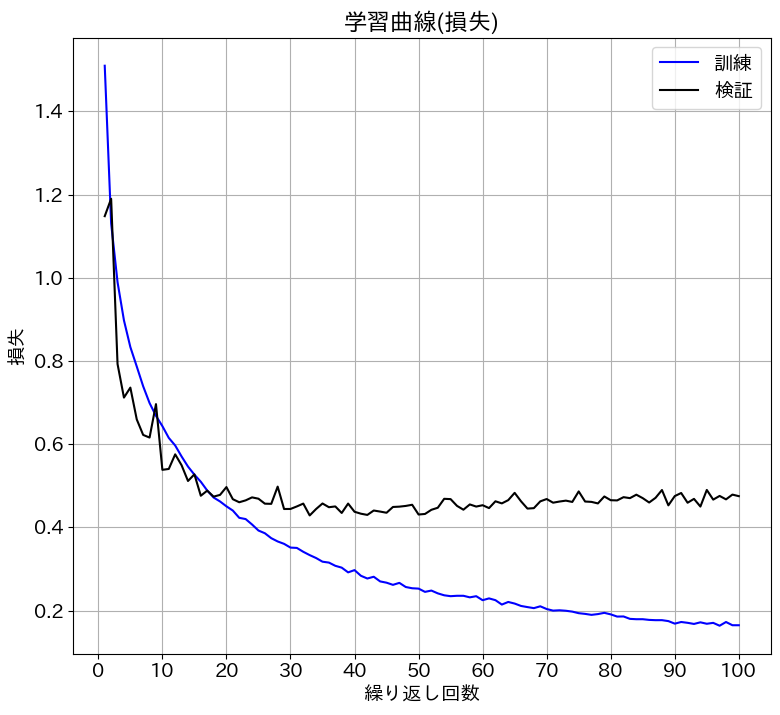

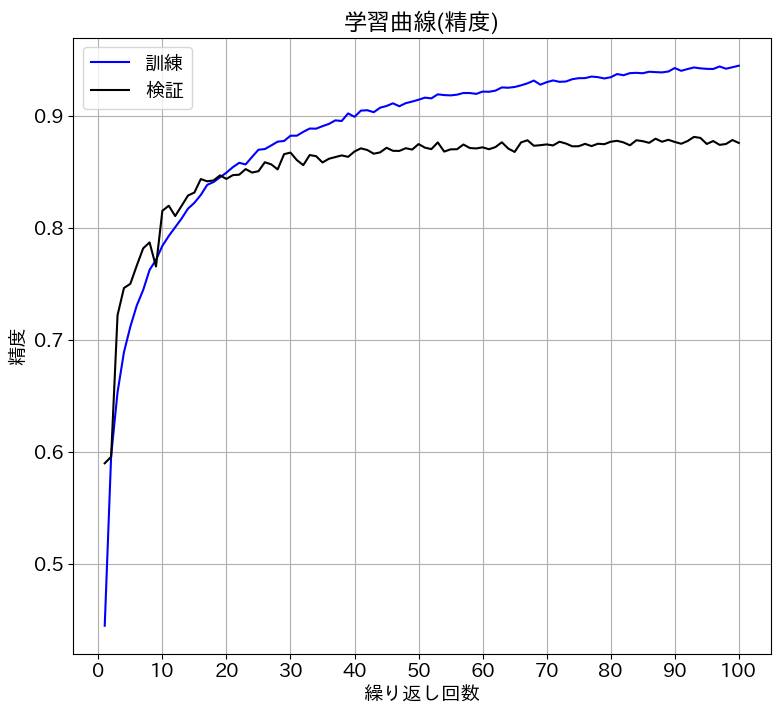

In [87]:
evaluate_history(history)

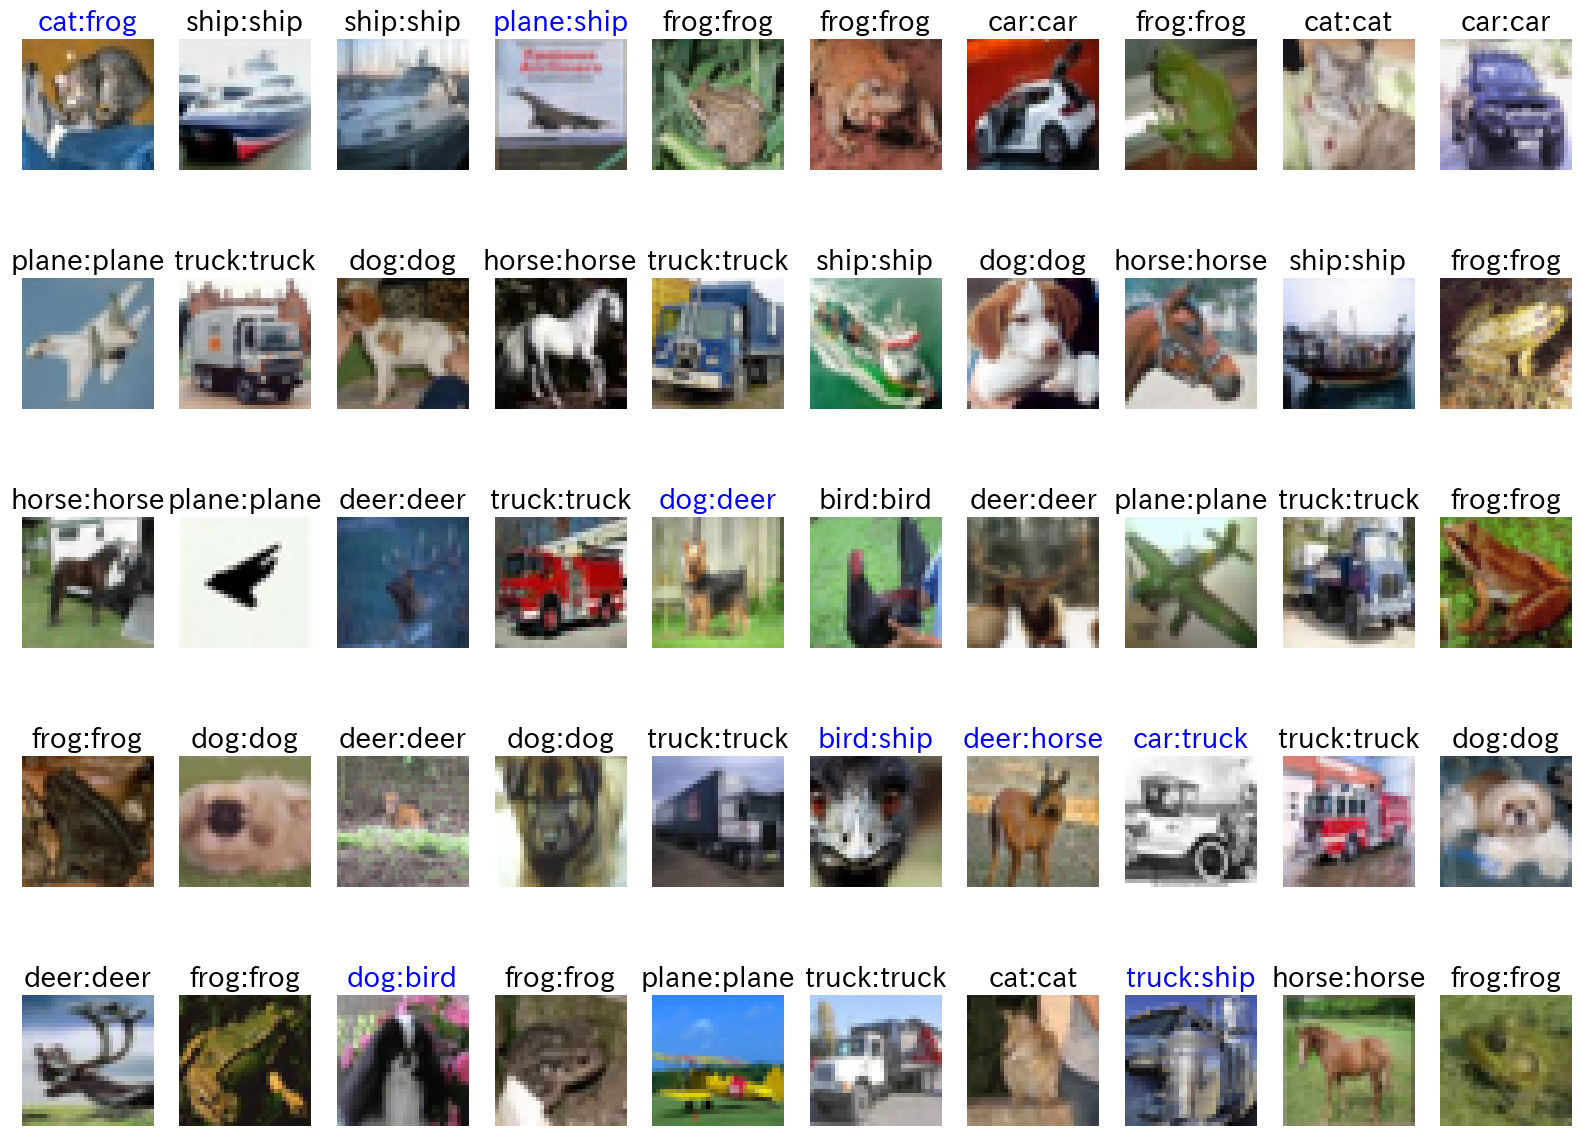

In [91]:
show_images_labels(test_loader, classes, net, device)

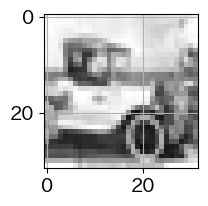

In [99]:
for images, labels in test_loader:
    break

image = images[37]
label = labels[37]

plt.figure(figsize=(2, 2))
w = image.numpy().copy()
w1 = np.transpose(w, (1, 2, 0))
w3 = (w1+1)/2
plt.imshow(w3)

In [123]:
image = image.view(1, 3, 32, 32)
image = image.to(device)
output = net(image)
probs = torch.softmax(output, dim=1)
probs = probs.data.to('cpu').numpy()[0]
values = np.frompyfunc(lambda x: f'{x:.04f}', 1, 1)(probs)
name = np.array(classes)
np.array([name, values]).T

array([['plane', '0.2773'],
       ['car', '0.0801'],
       ['bird', '0.0014'],
       ['cat', '0.0033'],
       ['deer', '0.0006'],
       ['dog', '0.0015'],
       ['frog', '0.0039'],
       ['horse', '0.0086'],
       ['ship', '0.0716'],
       ['truck', '0.5516']], dtype=object)

In [138]:
a = nn.Softmax(dim=1)
a(output).data.cpu().numpy()[0]

array([0.27726966, 0.08011213, 0.00144962, 0.00326927, 0.00062288,
       0.00147459, 0.00391862, 0.00861354, 0.07164082, 0.5516289 ],
      dtype=float32)

In [128]:
probs

array([0.27726966, 0.08011213, 0.00144962, 0.00326927, 0.00062288,
       0.00147459, 0.00391862, 0.00861354, 0.07164082, 0.5516289 ],
      dtype=float32)